In [1]:
# L2/L1 Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('BankNote_Authentication.csv')
X = data.drop('class', axis=1)
Y = data['class']

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [4]:
def perform_gradient_descent(X, Y, learning_rate, epochs):
  m, n = X.shape
  W = np.zeros(n)
  for _ in range(epochs):
      predictions = np.dot(X, W)
      error = predictions - Y
      gradient = np.dot(X.T, error) / m
      W -= learning_rate * gradient
  return W

def perform_gradient_descent_L2(X, Y, learning_rate, epochs, lambda_):
  m, n = X.shape
  W = np.zeros(n)
  for _ in range(epochs):
      predictions = np.dot(X, W)
      error = predictions - Y
      gradient = np.dot(X.T, error) / m + lambda_ * W
      W -= learning_rate * gradient
  return W

def make_predictions(X, W):
  return np.dot(X, W)

def compute_accuracy(Y_true, Y_pred):
  return np.mean(Y_true == Y_pred)

W = perform_gradient_descent(X_train, Y_train, 1e-5, 10000)
Y_pred = make_predictions(X_test, W)
Y_pred = np.round(Y_pred)
print('Accuracy without L2 regularization:', compute_accuracy(Y_test, Y_pred))

W = perform_gradient_descent_L2(X_train, Y_train, 1e-5, 10000, 0.1)
Y_pred = make_predictions(X_test, W)
Y_pred = np.round(Y_pred)
print('Accuracy with L2 regularization:', compute_accuracy(Y_test, Y_pred))

Accuracy without L2 regularization: 0.6237864077669902
Accuracy with L2 regularization: 0.6213592233009708


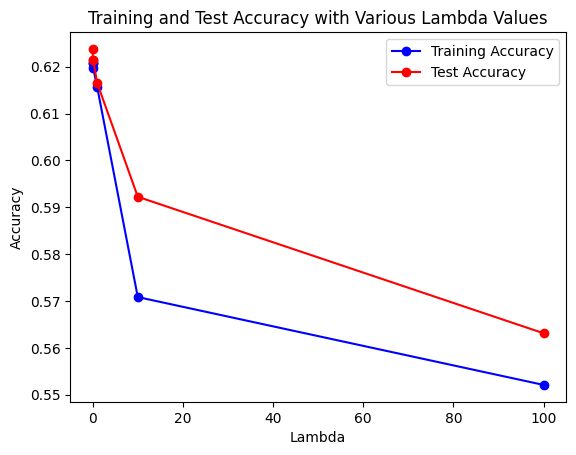

In [5]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
train_acc = []
test_acc = []

for lambda_ in lambdas:
  W = perform_gradient_descent_L2(X_train, Y_train, 1e-5, 10000, lambda_)
  Y_train_pred = make_predictions(X_train, W)
  Y_train_pred = np.round(Y_train_pred)
  train_acc.append(compute_accuracy(Y_train, Y_train_pred))
    
  Y_test_pred = make_predictions(X_test, W)
  Y_test_pred = np.round(Y_test_pred)
  test_acc.append(compute_accuracy(Y_test, Y_test_pred))


plt.plot(lambdas, train_acc, color='blue', label='Training Accuracy', marker='o')
plt.plot(lambdas, test_acc, color='red', label='Test Accuracy', marker='o')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy with Various Lambda Values')
plt.legend()
plt.savefig('accuracy_vs_lambda.png')
plt.show()

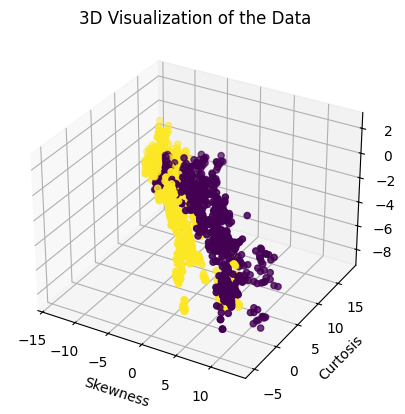

In [6]:
from mpl_toolkits.mplot3d import Axes3D # used internet to see how to plot 3D plot 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['skewness'], data['curtosis'], data['entropy'], c=data['class'])
ax.set_xlabel('Skewness')
ax.set_ylabel('Curtosis')
ax.set_zlabel('Entropy')
plt.title('3D Visualization of the Data')
plt.savefig('3d_plot.png')
plt.show()

In [7]:
X_train['skewness'] += 10
X_train['curtosis'] += 10
X_train['entropy'] += 10

In [8]:
W = perform_gradient_descent(X_train, Y_train, 1e-5, 10000)
Y_pred = make_predictions(X_test, W)
Y_pred = np.round(Y_pred)
print('Accuracy without L2 regularization with outliers:', compute_accuracy(Y_test, Y_pred))

W = perform_gradient_descent_L2(X_train, Y_train, 1e-5, 10000, 0.1)
Y_pred = make_predictions(X_test, W)
Y_pred = np.round(Y_pred)
print('Accuracy with L2 regularization with outliers:', compute_accuracy(Y_test, Y_pred))

Accuracy without L2 regularization with outliers: 0.5728155339805825
Accuracy with L2 regularization with outliers: 0.5728155339805825
